# Page View Time Series Visualizer

This is the project for completion of the certificate course of Data Analysis in Python offered by FreeCodeCamp. <br>

You can find the project link at https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

FreeCodeCamp provide the boilerplate to complete the project. <br>
However, I find it easy to first complete project using notebook. <br>

You can find complete project on my github account at https://github.com/sujit-empire/Page-View-Time-Series-Visualizer

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fcc-forum-page-visits/fcc-forum-pageviews.csv


Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [7]:
df = pd.read_csv('/kaggle/input/fcc-forum-page-visits/fcc-forum-pageviews.csv',parse_dates = True, index_col = 'date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [10]:
df.shape

(1304, 1)

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [17]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views. <br>
Note the pyhon file is available on my github account.

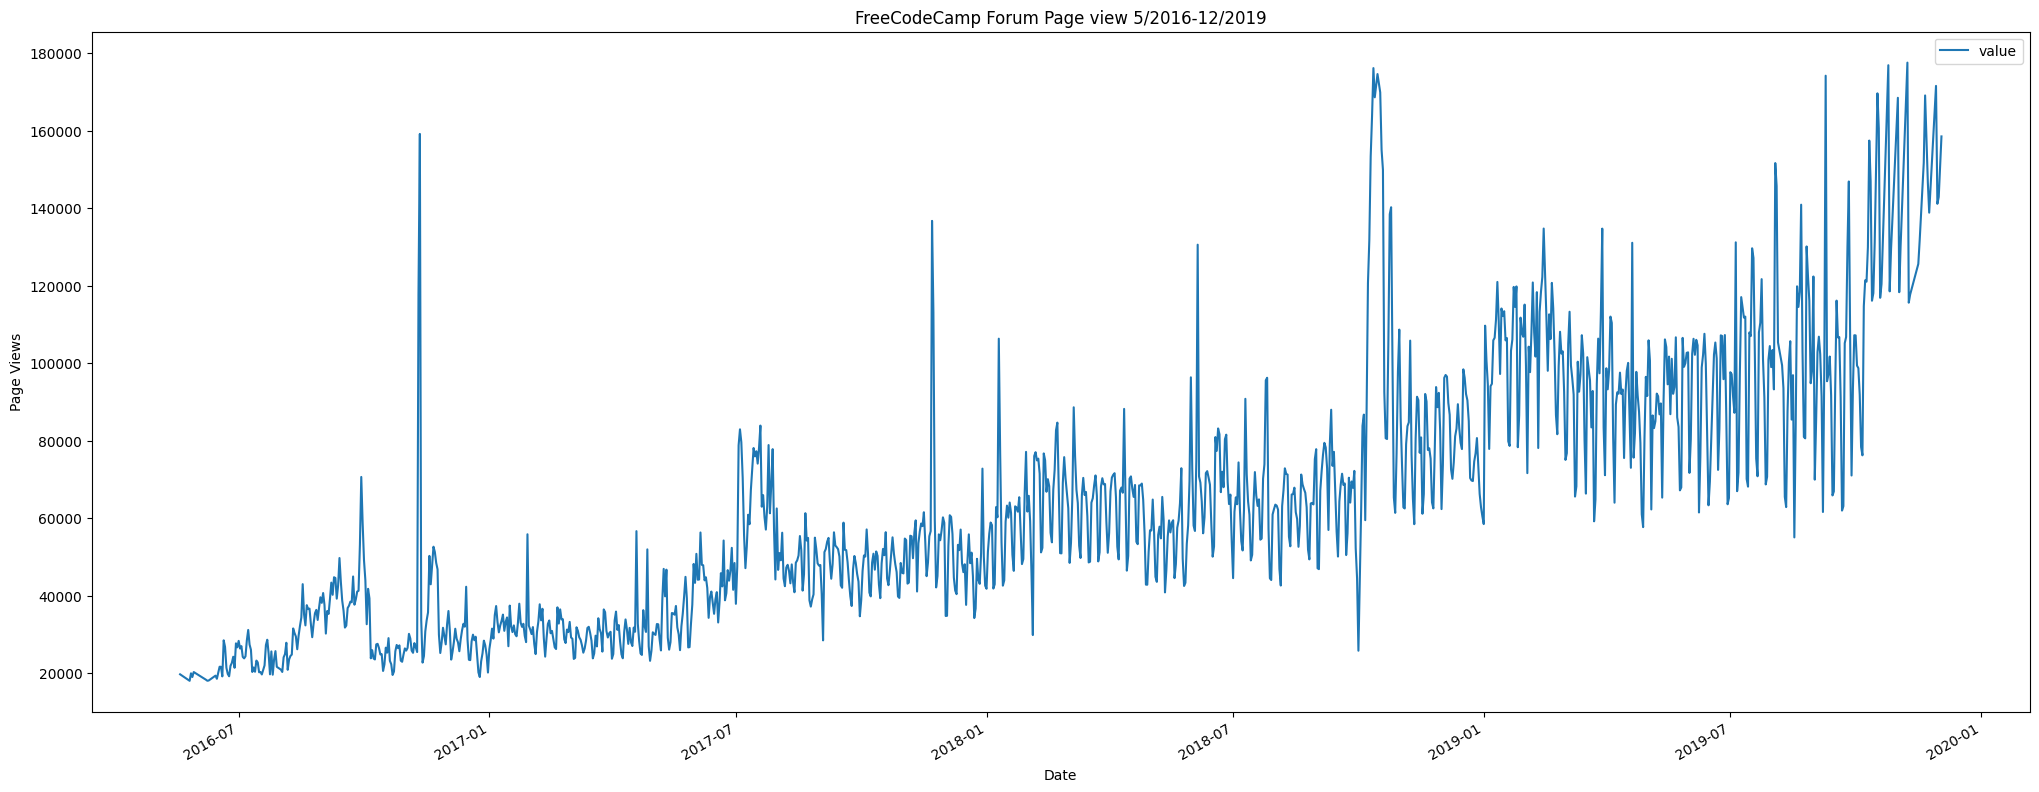

In [24]:
df.plot(figsize=(25,10))
plt.xlabel("Date")
plt.ylabel('Page Views')
plt.title('FreeCodeCamp Forum Page view 5/2016-12/2019')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

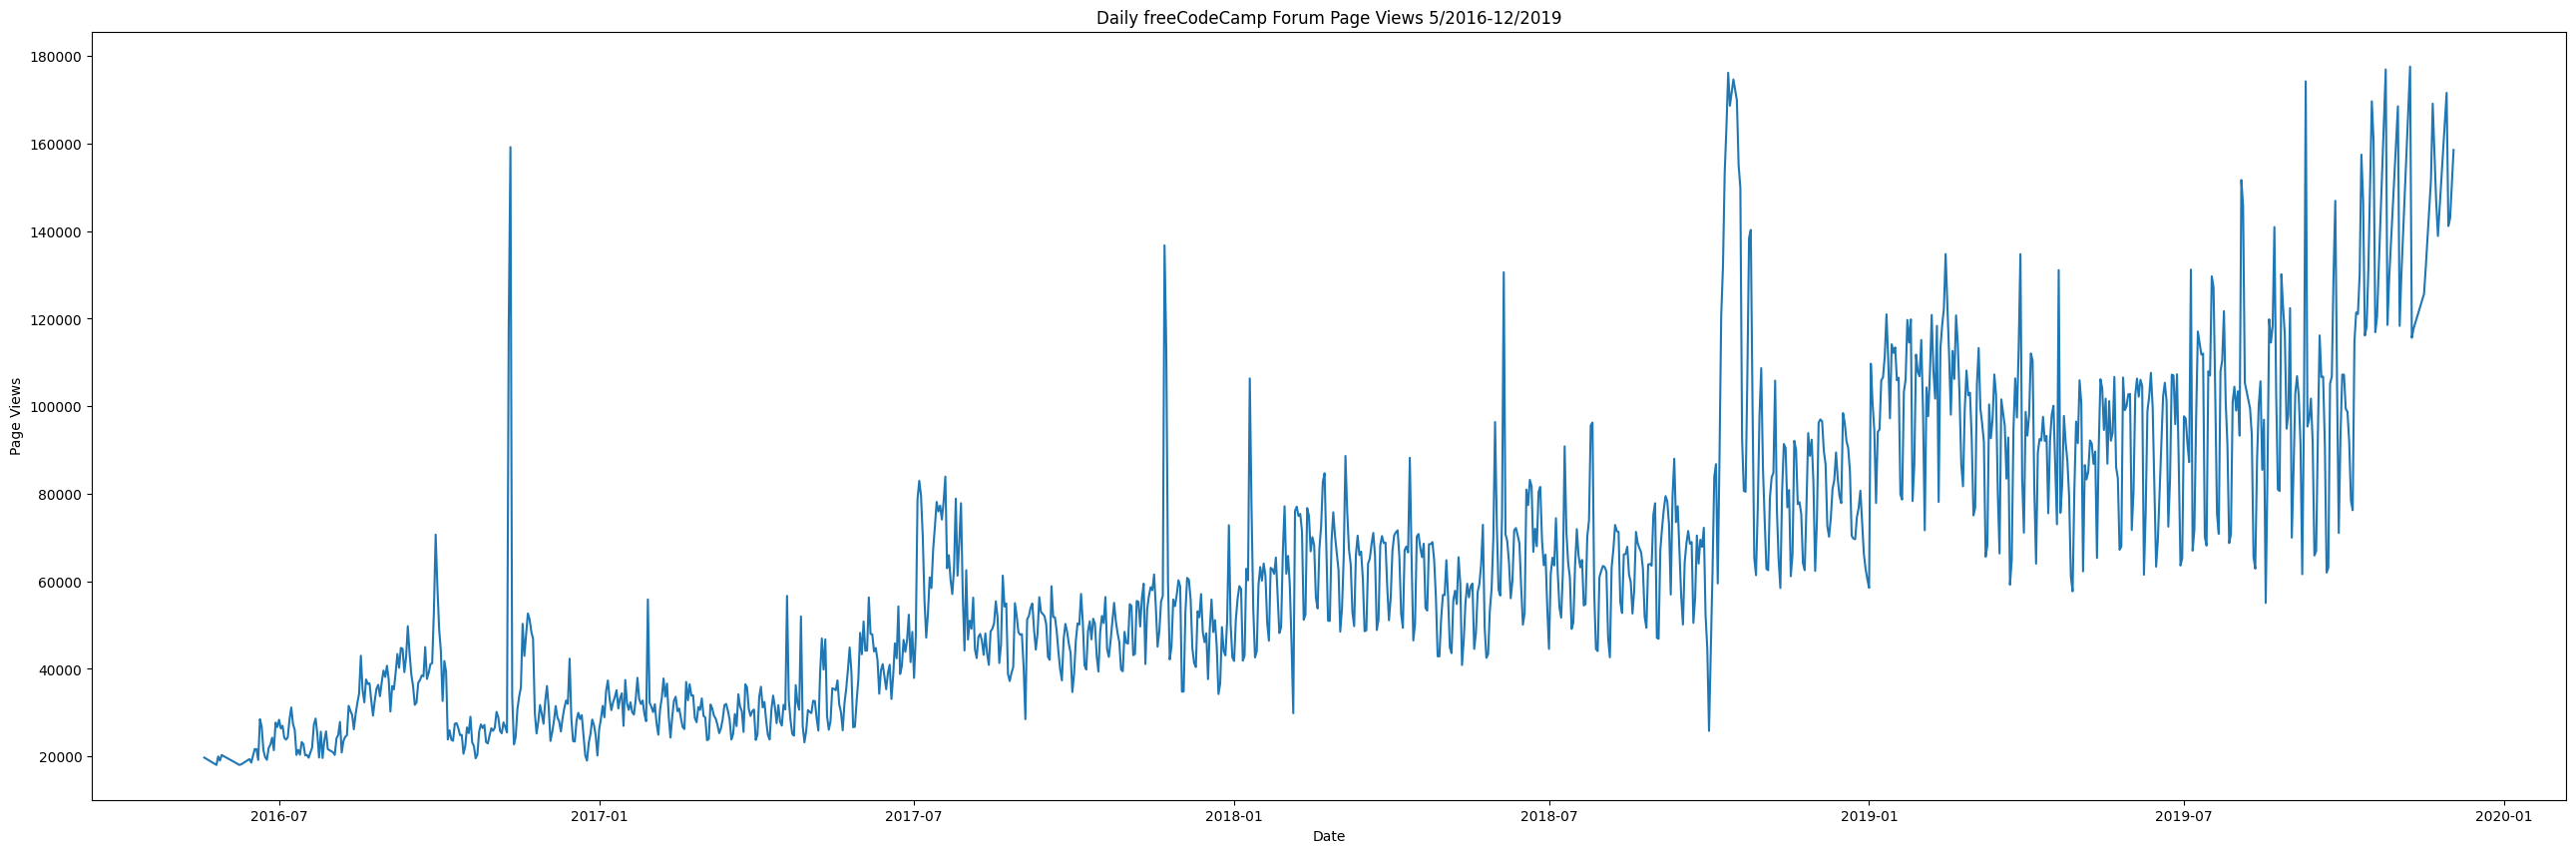

In [26]:
fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
sns.lineplot(data=df, legend=False)

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [27]:
# Creating a new dataframe or copying df
bar_df = df.copy()
bar_df['Years'] = bar_df.index.year
bar_df['Months'] = bar_df.index.month_name()
bar_df = pd.DataFrame(bar_df.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
bar_df = bar_df.rename(columns={"value": "Average Page Views"})
bar_df = bar_df.reset_index()
bar_df

,Years,Months,Average Page Views
0,2016,May,19432
1,2016,June,21875
2,2016,July,24110
3,2016,August,31049
4,2016,September,41477
5,2016,October,27398
6,2016,November,40449
7,2016,December,27832
8,2017,January,32785
9,2017,February,31113


In [29]:
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

bar_df = pd.concat([pd.DataFrame(missing_data), bar_df])

[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019')]

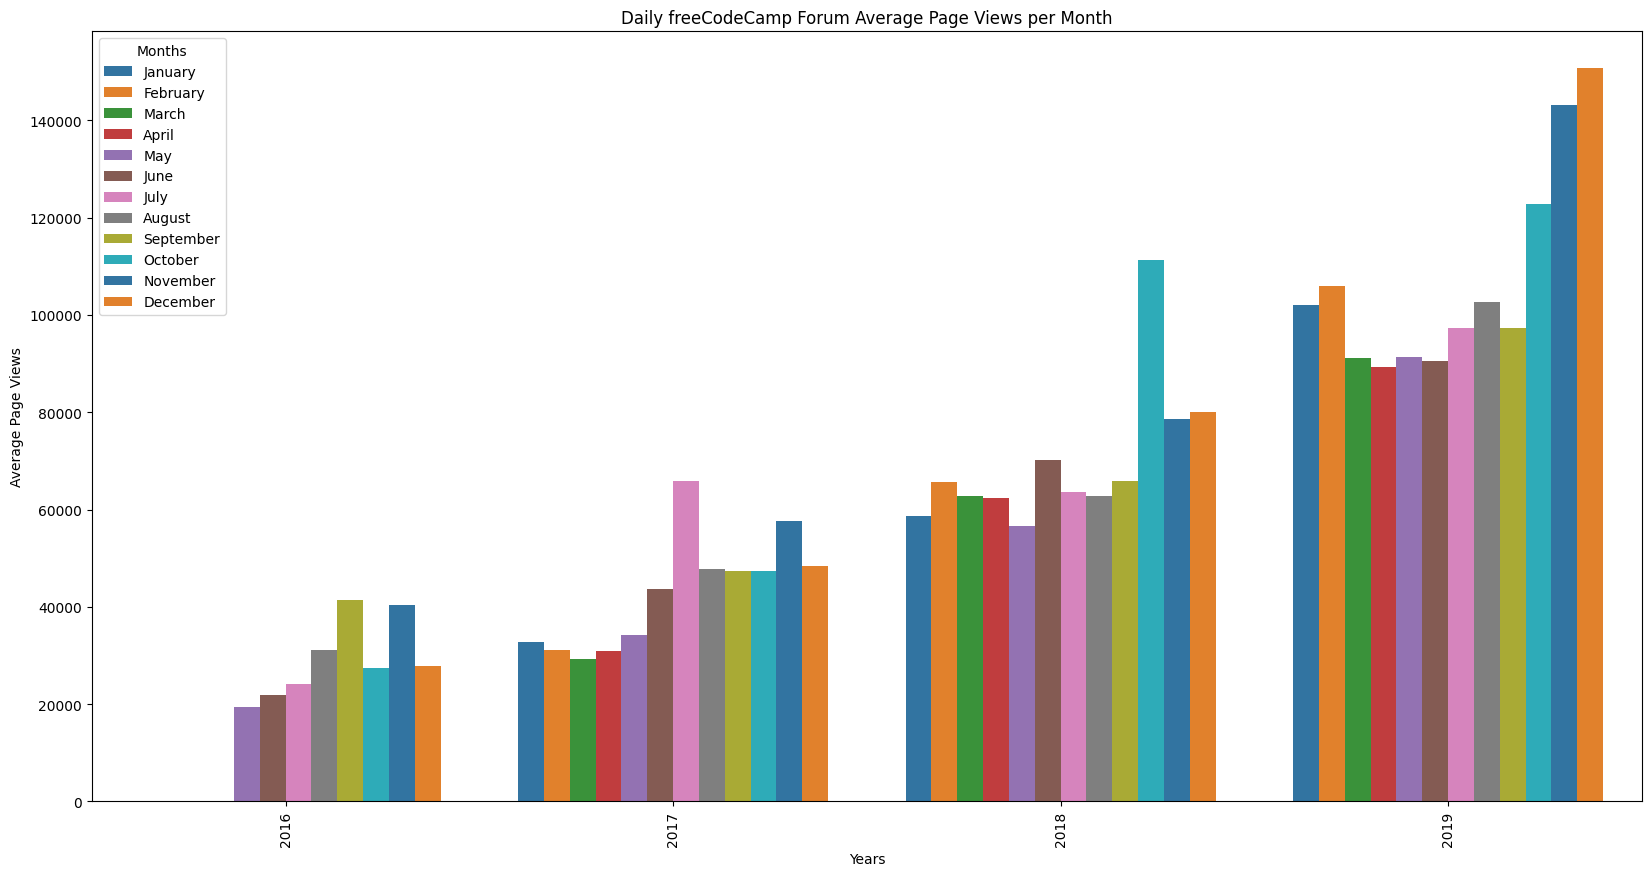

In [30]:
fig, ax = plt.subplots(figsize=(20,10),dpi=100)
ax.set_title('Daily freeCodeCamp Forum Average Page Views per Month')
chart = sns.barplot(data=bar_df, x='Years', y='Average Page Views',hue='Months',palette = 'tab10')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [31]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


Text(0, 0.5, 'Page Views')

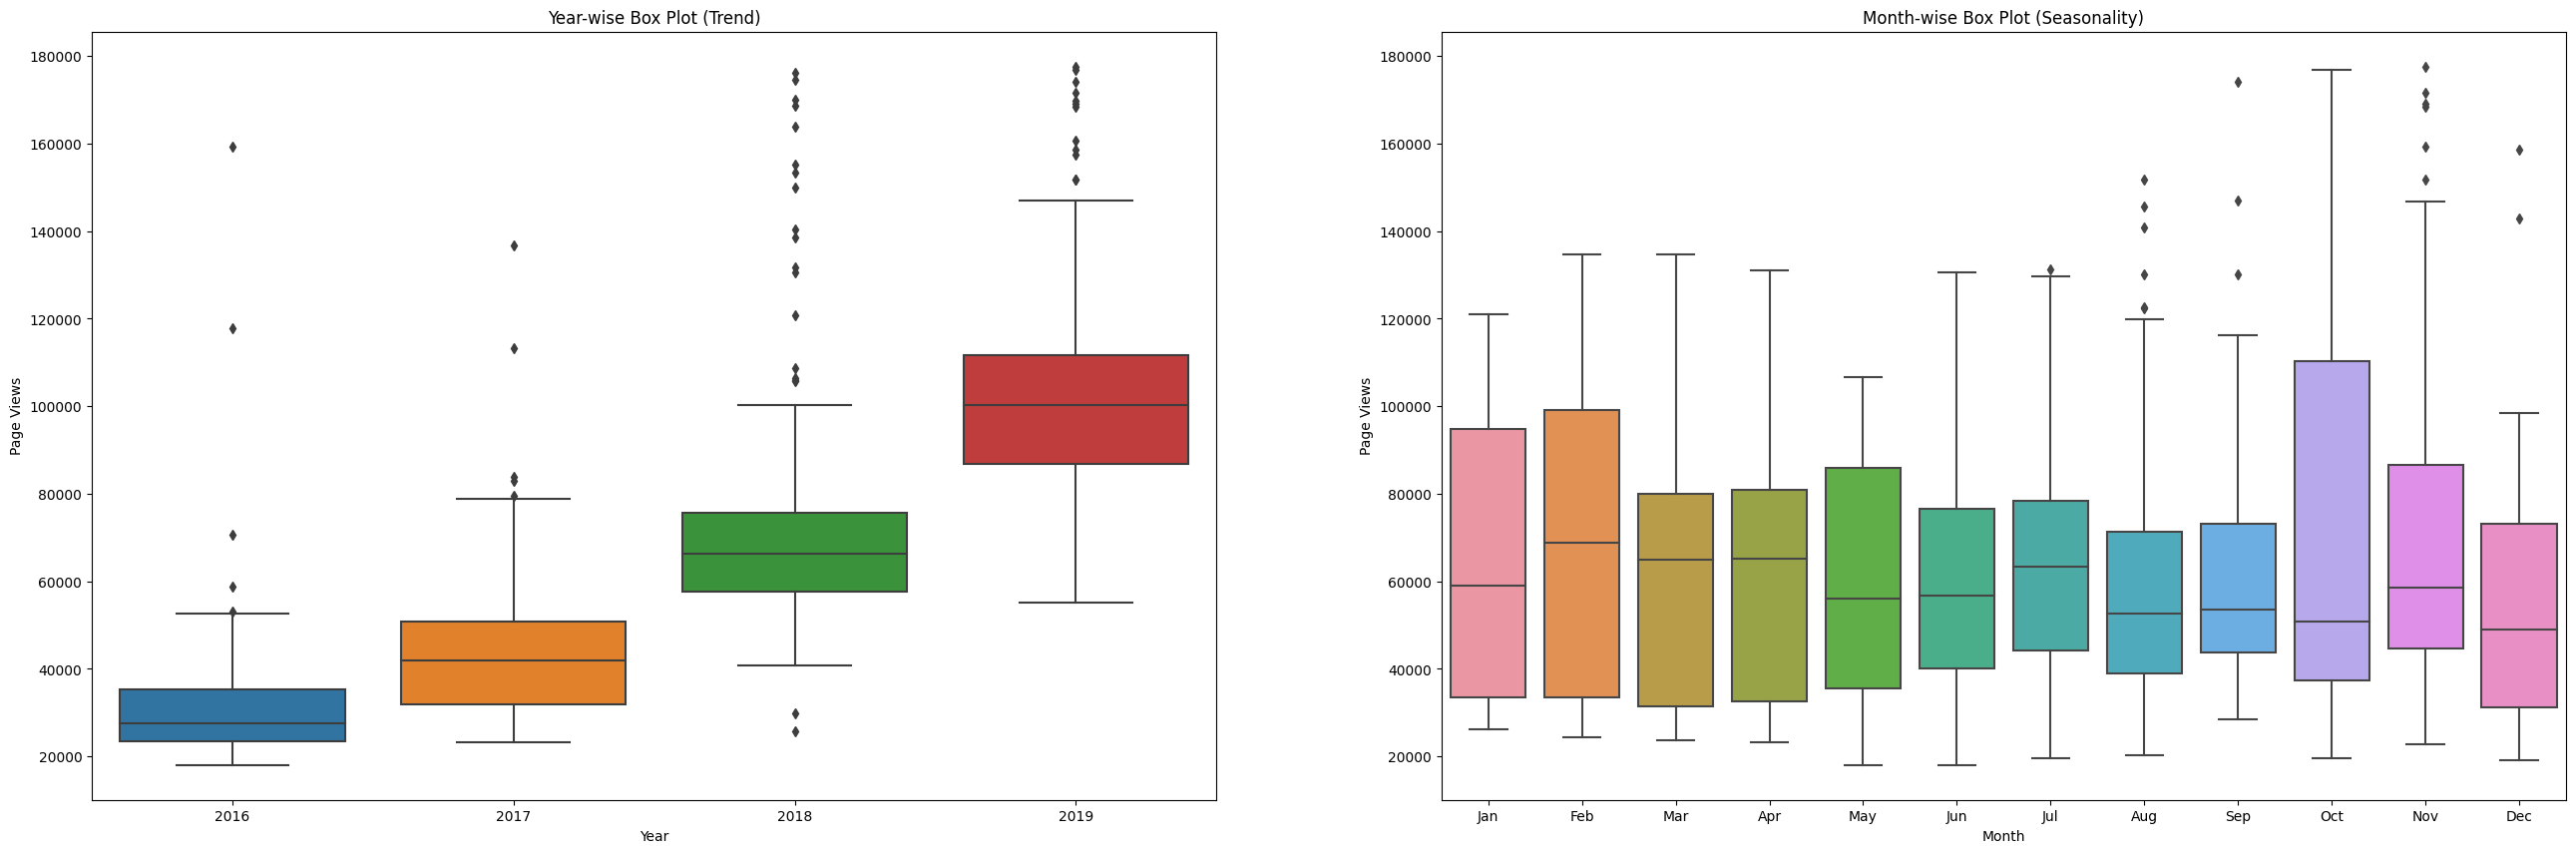

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)
# Yearly boxplot
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
    
# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")